In [5]:
import warnings
warnings.filterwarnings("ignore")

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import make_scorer
from sklearn.decomposition import PCA

In [7]:
df = pd.read_csv('spg.csv')

PARTIE 1 : DATA EXPLORATION AND VISUALIZATION

In [8]:
df.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
count,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,...,4213.000000,4213.000000,4213.000000,4213.00000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000
mean,15.068111,51.361025,1019.337812,0.031759,0.002808,34.056990,14.458818,20.023499,21.373368,387.759036,...,195.078452,18.978483,191.166862,16.36319,192.447911,20.583489,50.837490,59.980947,169.167651,1134.347313
std,8.853677,23.525864,7.022867,0.170212,0.038015,42.843638,30.711707,36.387948,38.013885,278.459293,...,106.626782,11.999960,108.760021,9.88533,106.516195,12.648899,26.638965,19.857711,64.568385,937.957247
min,-5.350000,7.000000,997.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.540000,0.000000,1.120000,0.00000,1.120000,0.720000,3.755323,17.727761,54.379093,0.000595
25%,8.390000,32.000000,1014.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,142.400000,...,153.190000,10.140000,130.240000,9.18000,148.220000,11.160000,29.408181,45.291631,114.136600,231.700450
50%,14.750000,48.000000,1018.100000,0.000000,0.000000,8.700000,0.000000,0.000000,0.000000,381.810000,...,191.770000,16.240000,187.770000,14.49000,187.990000,18.000000,47.335557,62.142611,163.241650,971.642650
75%,21.290000,70.000000,1023.600000,0.000000,0.000000,100.000000,9.000000,10.000000,10.000000,599.860000,...,292.070000,26.140000,292.040000,21.97000,288.000000,27.000000,69.197492,74.346737,225.085620,2020.966700
max,34.900000,100.000000,1046.800000,3.200000,1.680000,100.000000,100.000000,100.000000,100.000000,952.300000,...,360.000000,66.880000,360.000000,61.11000,360.000000,84.960000,121.635920,128.415370,289.045180,3056.794100


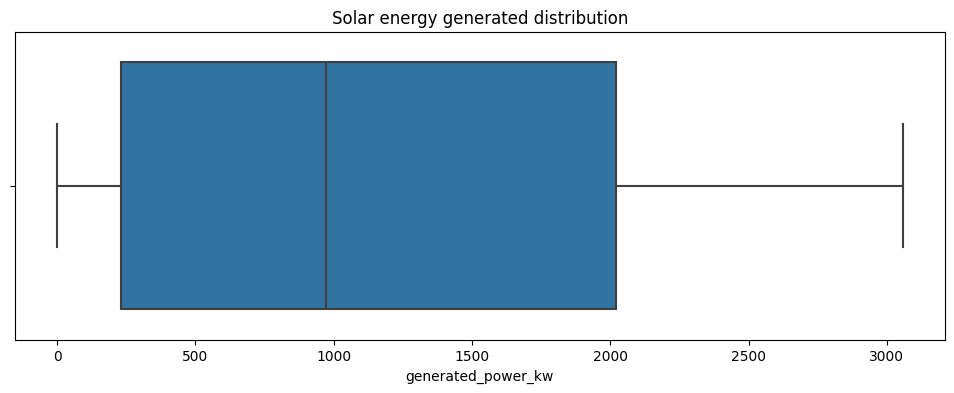

In [12]:
plt.figure(figsize=(12, 4))
sns.boxplot(x = df['generated_power_kw'])
plt.title('Solar energy generated distribution')
plt.show()

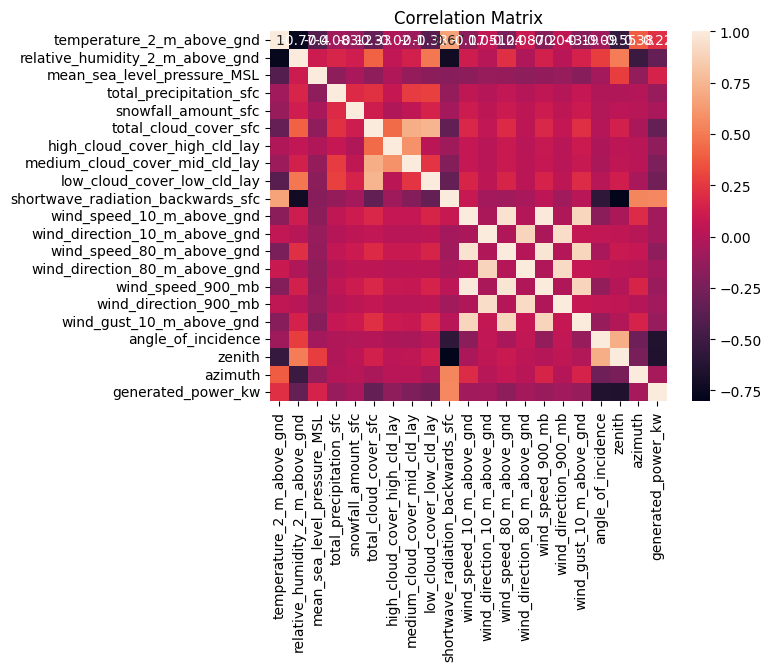

In [15]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

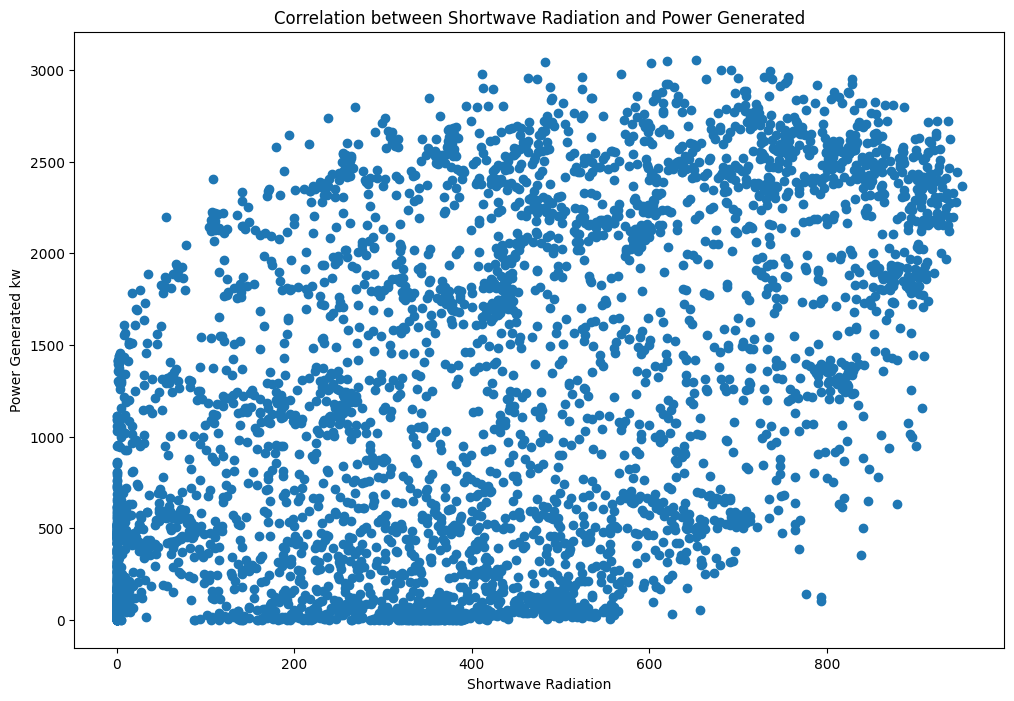

In [13]:
plt.figure(figsize=(12, 8))
plt.scatter(df["shortwave_radiation_backwards_sfc"], df["generated_power_kw"])
plt.title("Correlation between Shortwave Radiation and Power Generated")
plt.xlabel("Shortwave Radiation")
plt.ylabel("Power Generated kw")
plt.show()

PARTIE 3 : DATA PREPARATION

In [14]:
# We define X and y
X = df.drop('generated_power_kw', axis=1)
y = df['generated_power_kw']

In [16]:
# We scale our features
scaler = RobustScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [17]:
# We split the data in train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3370, 20), (843, 20), (3370,), (843,))

PARTIE 4 : REGRESSION MODELS

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred_l = lr.predict(X_test)

In [22]:
mse_l = mean_squared_error(y_test, y_pred_l)
rmse_l = np.sqrt(mse_l)
rmse_l

515.1888563840531

In [24]:
r2_lr = r2_score(y_test, y_pred_l)
r2_lr

0.6966327101466951

In [25]:
Knr = KNeighborsRegressor(n_neighbors = 3)
Knr.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [26]:
y_pred_k = Knr.predict(X_test)

In [27]:
mse_k = mean_squared_error(y_test, y_pred_k)
rmse_k = np.sqrt(mse_k)
rmse_k

545.3681505680329

In [28]:
r2_k = r2_score(y_test, y_pred_k)
r2_k

0.6600497430230559

In [43]:
svr = SVR(kernel="rbf")
svr.fit(X_train,y_train)

SVR()

In [44]:
y_pred_svr = svr.predict(X_test)

In [45]:
mse_s = mean_squared_error(y_test, y_pred_svr)
rmse_s = np.sqrt(mse_s)
rmse_s

880.9540977403224

In [47]:
r2_svr = r2_score(y_test, y_pred_svr)
r2_svr

0.11296166182493628

In [48]:
param_grid = {'n_estimators' : [50,100,200,300,400],
             'gamma' : [0.01,0,0.1,1]}
grid = GridSearchCV(xgb.XGBRegressor(),param_grid = param_grid,cv = 4, scoring = make_scorer(r2_score) )
grid.fit(X_train,y_train)

GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'gamma': [0.01, 0, 0.1, 1],
                         'n_estimators': [50, 100, 200, 300, 400]},
             scoring=make_scorer(r2_score))

In [49]:
xgbr_grid = grid.best_estimator_
xgbr_grid.fit(X_train,y_train)
y_pred_xgbr_grid = xgbr_grid.predict(X_test)

In [50]:
mse_xgb = mean_squared_error(y_test,y_pred_xgbr_grid)
rmse_xgb = np.sqrt(mse_xgb)
rmse_xgb

448.52474659790016

In [51]:
r2_xgb = r2_score(y_test,y_pred_xgbr_grid)
r2_xgb

0.770063111811049

In [61]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [62]:
y_pred_rfr = rfr.predict(X_test)

In [63]:
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
rmse_rfr = np.sqrt(mse_rfr)
rmse_rfr

429.83909933083896

In [64]:
r2_rfr = r2_score(y_test,y_pred_rfr)
r2_rfr

0.7888224895535745

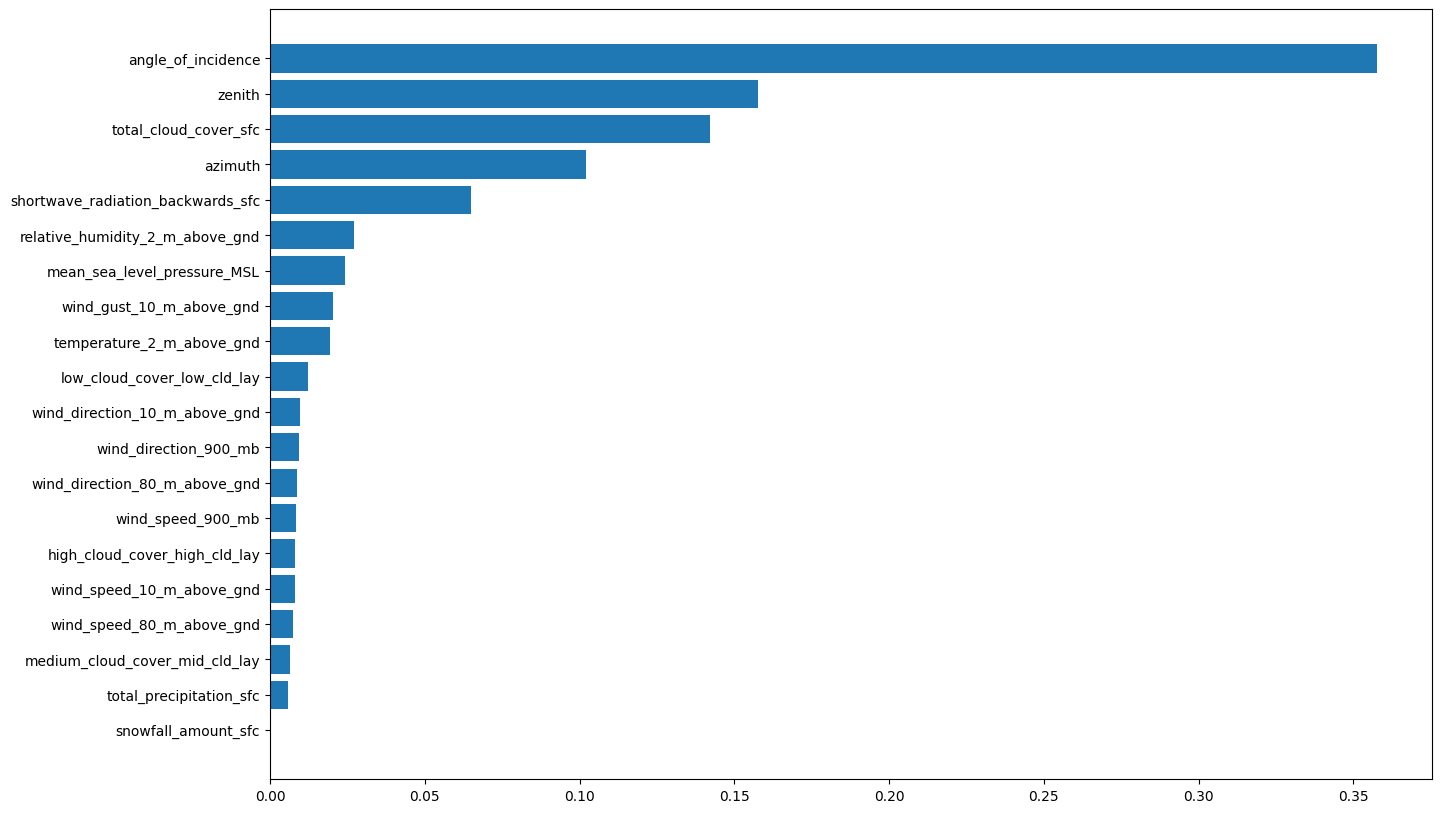

In [68]:
# Features importance
indices = np.argsort(rfr.feature_importances_)
features = df.columns
plt.figure(figsize=(15, 10))
plt.barh(range(len(indices)), rfr.feature_importances_[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.show()

In [ ]:
PARTIE 5 : USING PCA AND REMOVE SOME FEATURES NON EFFICIENT

In [70]:
# PCA
pca = PCA(n_components=10)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [72]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, test_size=0.2,random_state=0)

In [73]:
lr.fit(X_pca_train, y_pca_train)

LinearRegression()

In [74]:
y_pred_lpca = lr.predict(X_pca_test)

In [75]:
mse_lpca = mean_squared_error(y_pca_test, y_pred_lpca)
rmse_lpca = np.sqrt(mse_lpca)
rmse_lpca

527.223265527775

In [76]:
rfr.fit(X_pca_train, y_pca_train)

RandomForestRegressor()

In [77]:
y_pred_rfrpca = rfr.predict(X_pca_test)

In [79]:
mse_rfrpca = mean_squared_error(y_pca_test, y_pred_rfrpca)
rmse_rfrpca = np.sqrt(mse_rfrpca)
rmse_rfrpca

464.19588179449926

In [81]:
# Now, we keep the 10 most efficient features according to our graph
features_ten = ['angle_of_incidence', 'zenith', 'total_cloud_cover_sfc', 'azimuth', 'shortwave_radiation_backwards_sfc',
                'relative_humidity_2_m_above_gnd', 'mean_sea_level_pressure_MSL', 'wind_gust_10_m_above_gnd', 
                'temperature_2_m_above_gnd', 'low_cloud_cover_low_cld_lay']

In [84]:
X_ten = df[features_ten]
scaler.fit(X_ten)
X_ten_scaled = scaler.transform(X_ten)

In [85]:
X_ten_train, X_ten_test, y_ten_train, y_ten_test = train_test_split(X_ten_scaled, y, test_size=0.2,random_state=0)

In [86]:
lr.fit(X_ten_train, y_ten_train)

LinearRegression()

In [87]:
y_pred_lrten = lr.predict(X_ten_test)

In [88]:
mse_lrten = mean_squared_error(y_ten_test, y_pred_lrten)
rmse_lrte = np.sqrt(mse_lrten)
rmse_lrte

513.0340753533452

In [89]:
rfr.fit(X_ten_train, y_ten_train)

RandomForestRegressor()

In [90]:
y_pred_rfrten = rfr.predict(X_ten_test)

In [91]:
mse_rfrten = mean_squared_error(y_ten_test, y_pred_rfrten)
rmse_rfrten = np.sqrt(mse_rfrten)
rmse_rfrten

434.1613658366159

In [92]:
r2_rfrten = r2_score(y_ten_test,y_pred_rfrten)
r2_rfrten

0.7845541265363893